<a href="https://colab.research.google.com/github/sohom21d/Multimodal-Brain-Tumour-Segmentation/blob/master/Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Check hardware

In [ ]:
! lscpu |grep 'Model name'
! lscpu |grep 'Core(s) per socket'
! nvidia-smi -L

### Prevent Idle Timeout
Ctrl+ Shift + i to open inspector view . Then goto console and paste this code.
```
function ClickConnect(){
    console.log("Clicked on connect button");
    document.querySelector("colab-connect-button").click() 
 }
 setInterval(ClickConnect,60000)
```



In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
! unzip -q '/content/drive/My Drive/Datasets/BRATS2020/MICCAI_BraTS2020_TrainingData.zip'

In [ ]:
import os
import glob
import gzip
import shutil

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Extract all .gz files

# Get the list of all .gz file paths
files = glob.glob('/content/MICCAI_BraTS2020_TrainingData/**/*.gz')

for f in files:
  
  # Read .gz file
  with gzip.GzipFile(f, 'rb') as input:
    s = input.read()

  save_path = f[:-3]

  # Save without .gz
  with open(save_path, 'wb') as output:
    output.write(s)

  # Remove the original .gz file
  os.remove(f)

In [ ]:
import nibabel as nib

In [ ]:
def read(file_path):
  img = nib.load(file_path).get_fdata()
  return img

In [ ]:
data_path = '/content/MICCAI_BraTS2020_TrainingData'

samples = sorted(os.listdir(data_path))
print(len(samples))

371


In [ ]:
train_samples = samples[:300]
valid_samples = samples[300:]

In [ ]:
def get_img(sample):
  t1 = read(f'{data_path}/{sample}/{sample}_t1.nii')
  t1ce = read(f'{data_path}/{sample}/{sample}_t1ce.nii')
  t2 = read(f'{data_path}/{sample}/{sample}_t2.nii')
  flair = read(f'{data_path}/{sample}/{sample}_flair.nii')
  img = np.dstack([t1, t1ce, t2, flair])
  return img

In [ ]:
def get_msk(sample):
  msk = read(f'{data_path}/{sample}/{sample}_seg.nii')
  return msk

In [ ]:
img = get_img(train_samples[1])
msk = get_msk(train_samples[1])

print(img.shape)
print(msk.shape)

(240, 240, 620)
(240, 240, 155)


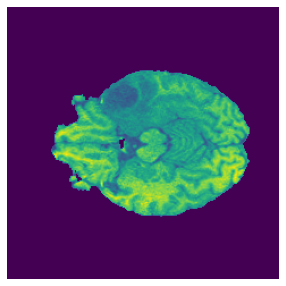

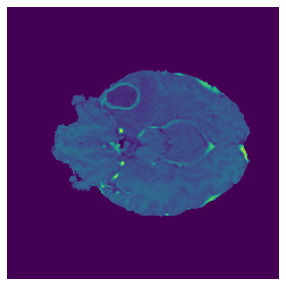

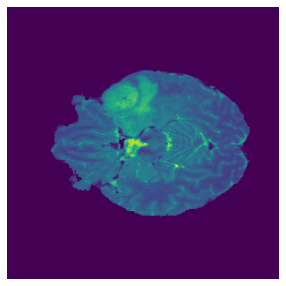

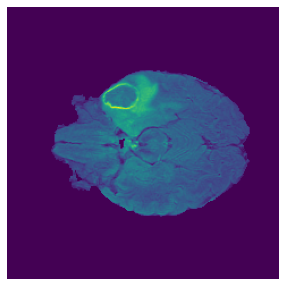

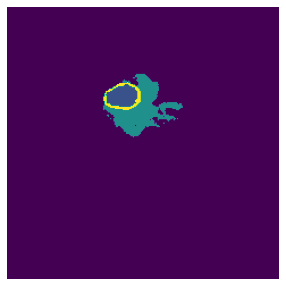

In [ ]:
c = 50

fig = plt.figure(figsize=(5,5))
plt.imshow(img[:,:,c])
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(5,5))
plt.imshow(img[:,:,155+c])
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(5,5))
plt.imshow(img[:,:,2*155+c])
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(5,5))
plt.imshow(img[:,:,3*155+c])
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(5,5))
plt.imshow(msk[:,:,c])
plt.axis('off')
plt.show()